# **Project Name**    -



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Team Member** - RINA PATEL

# **Project Summary -**

Introduction:
 In this project, we leverage unsupervised machine learning techniques to analyze book features, user preferences,ratings and purchase histories to generate tailored book recommendations. This system aims to enhance the user experience by helping readers discover books that align with their interests, leading to increased user engagement and satisfaction.

Personalized Recommendations: The primary objective of the project is to deliver book recommendations that cater to individual user preferences.

The Book-Crossing dataset comprises 3 files.

● Users :

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books :

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings :

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

Data Collection and Preprocessing: Gather a diverse dataset comprising information about books, such as title, author, genre, synopsis, and user data like purchase history and browsing behavior. This data is preprocessed to eliminate noise and inconsistencies.

Feature Engineering: Extract relevant features from books data, ratings data and users data.

Unsupervised Learning: The project focuses on employing unsupervised machine learning algorithms, such as Model Based Collaborative Filtering Recommender,Collaborative Filtering based Recommendation System-(Item Based), Collaborative Filtering based Recommendation System-(User based) and Popularity Based Filtering, to uncover patterns and similarities in books and user behavior.


Conclusion:
The Unsupervised Book Recommendation System project seeks to deliver a sophisticated and personalized book recommendation solution that empowers users to discover books that align with their interests. By leveraging unsupervised machine learning techniques, this project addresses the challenges of traditional recommendation systems and enhances the user experience by providing tailored recommendations, ultimately driving user engagement and satisfaction.

As the project advances and the system is deployed, continuous monitoring and feedback will play a crucial role in refining the recommendations and ensuring that users receive high-quality book suggestions.

# **GitHub Link -**

https://github.com/rins3005/Book_Recommendation_System.git.

# **Problem Statement**


**During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.**

* **The main objective is to create a book recommendation system for users.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

#hide warnigs
import warnings
warnings.filterwarnings(action='ignore')


### Dataset Loading

In [2]:
#loading user.csv data as users_df
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Users.csv')

In [3]:
#loading user.csv data as books_df
books_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Books.csv')

In [4]:
#loading user.csv data as ratings_df
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Ratings.csv')

### Dataset First View

In [5]:
# Dataset First Look of users data
users_df.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [6]:
# Dataset First Look of books data
books_df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [7]:
# Dataset First Look of ratings data
ratings_df.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count of users data
users_df.shape

(278858, 3)

In [9]:
# Dataset Rows & Columns count of books data
books_df.shape

(271360, 8)

In [10]:
# Dataset Rows & Columns count of ratings data
ratings_df.shape

(1149780, 3)

### Dataset Information

In [11]:
# Dataset Info of users data
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
# Dataset Info of books data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
# Dataset Info of ratings data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count of users data
users_df.duplicated().sum()

0

In [15]:
# Dataset Duplicate Value Count of books data
books_df.duplicated().sum()

0

In [16]:
# Dataset Duplicate Value Count of ratings data
ratings_df.duplicated().sum()

0

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count of users data
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: >

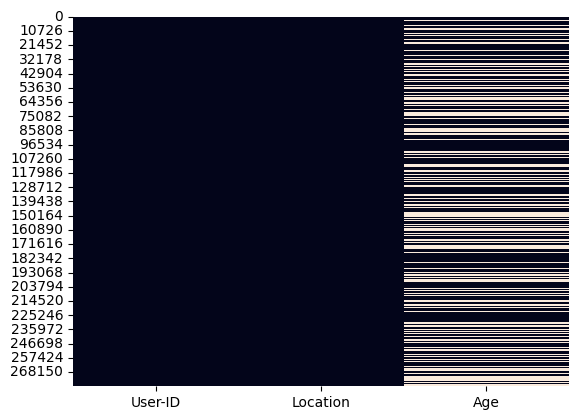

In [18]:
# Visualizing the missing values of users data
sns.heatmap(users_df.isna(), cbar=False)

In [19]:
# Missing Values/Null Values Count of books data
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

<Axes: >

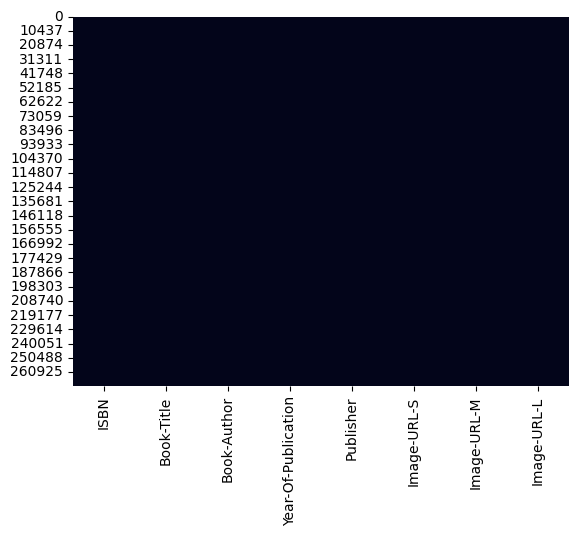

In [20]:
# Visualizing the missing values of books data
sns.heatmap(books_df.isna(), cbar=False)

In [21]:
# Missing Values/Null Values Count of ratings data
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Axes: >

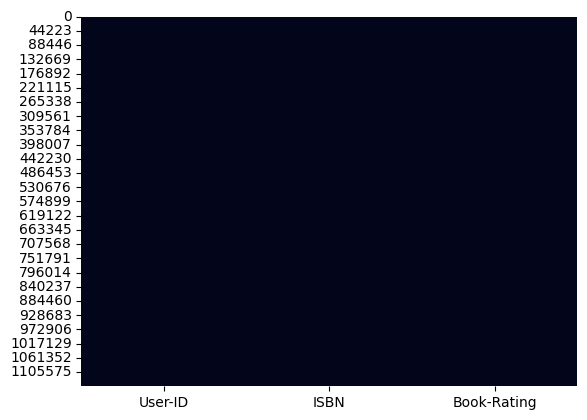

In [22]:
# Visualizing the missing values of ratings
sns.heatmap(ratings_df.isna(), cbar=False)

### What did you know about your dataset?

Answer Here
In this dataset contains shape of users_df is 278858, 3 shape of books_df is 271360, 8 shape of ratings_df is 1149780, 3.No duplicate values have been identified in the dataset. Around 39% of the data is missing in users_df of "Age" columns. Additionally, there are also some missing values in the"Book-Author","Image-URL-L" and "Publisher" of books_df dataset. No missing value in ratings_df dataset.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns of users data
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [24]:
# Dataset Describe of users data
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [25]:
# Dataset Columns of books data
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [26]:
# Dataset Describe of books data
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [27]:
# Dataset Columns of ratings data
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [28]:
# Dataset Describe of ratings data
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

Answer Here
The users_df dataset comprises 3 variables, with 2 being numeric and 1 being of object type.
The books_df dataset comprises  8 variables, all of object type.
The ratings_df dataset comprises 3 variables,with 2 being numeric and 1 being of object type.

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable of users data.
for i in users_df.columns.tolist():
    print("No. of unique values in ",i,"is",users_df[i].unique(),".")
    print('')

No. of unique values in  User-ID is [     1      2      3 ... 278856 278857 278858] .

No. of unique values in  Location is ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom'] .

No. of unique values in  Age is [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 1

In [30]:
for i in users_df.columns.tolist():
  print("No. of unique values in ",i,"is",users_df[i].nunique(),".")

No. of unique values in  User-ID is 278858 .
No. of unique values in  Location is 57339 .
No. of unique values in  Age is 165 .


In [31]:
# Check Unique Values for each variable of books data.
for i in books_df.columns.tolist():
    print("No. of unique values in ",i,"is",books_df[i].unique(),".")
    print('')

No. of unique values in  ISBN is ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752'] .

No. of unique values in  Book-Title is ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"] .

No. of unique values in  Book-Author is ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle'] .

No. of unique values in  Year-Of-Publication is [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 19

In [32]:
for i in books_df.columns.tolist():
  print("No. of unique values in ",i,"is",books_df[i].nunique(),".")

No. of unique values in  ISBN is 271360 .
No. of unique values in  Book-Title is 242135 .
No. of unique values in  Book-Author is 102023 .
No. of unique values in  Year-Of-Publication is 202 .
No. of unique values in  Publisher is 16807 .
No. of unique values in  Image-URL-S is 271044 .
No. of unique values in  Image-URL-M is 271044 .
No. of unique values in  Image-URL-L is 271041 .


In [33]:
# Check Unique Values for each variable of ratings data.
for i in ratings_df.columns.tolist():
    print("No. of unique values in ",i,"is",ratings_df[i].unique(),".")
    print('')

No. of unique values in  User-ID is [276725 276726 276727 ... 276709 276721 276723] .

No. of unique values in  ISBN is ['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314'] .

No. of unique values in  Book-Rating is [ 0  5  3  6  8  7 10  9  4  1  2] .



In [34]:
for i in ratings_df.columns.tolist():
  print("No. of unique values in ",i,"is",ratings_df[i].nunique(),".")

No. of unique values in  User-ID is 105283 .
No. of unique values in  ISBN is 340556 .
No. of unique values in  Book-Rating is 11 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [35]:
# Write your code to make your dataset analysis ready.

**users_df**

In [36]:
#function for checking missing value
def check_missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = round(df.isnull().mean().mul(100),2)
    mis_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_table = mis_table.rename(columns = {0:'Missing Values',1:'Missing Values %'})
    mis_table['Data_type']=df.dtypes
    mis_table = mis_table.sort_values('Missing Values %',ascending=False)
    return mis_table.reset_index()

In [37]:
#checking missing value in Users dataset
check_missing_values(users_df)

,index,Missing Values,Missing Values %,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [38]:
#how many unique value present in location
users_df['Location'].nunique()

57339

In [39]:
users_df['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [40]:
#what's unique value present in location
users_df['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

**books_df**

In [41]:
#unique value of Publication year
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('str')
a = list(books_df['Year-Of-Publication'].unique())
a = set(a)
a = list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [42]:
#checking the row having 'DK Publishing Inc' as Year-Of-Publication
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Year-Of-Publication data exchanged with Book-Author we need to correct the entry of data

In [43]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [44]:
#checking the row having 'DK Publishing Inc' as Year-Of-Publication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [45]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books_df.loc[books_df.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [46]:
#changing Year-Of-Publication datatypes as numeric
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
print(sorted(books_df['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**rating_df**

ratings_df dataset should have books only which exist in our books_df dataset


In [47]:
#how many ratings match in our books_df ISBN number
ratings_df_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
ratings_df.shape,ratings_df_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of our books_df dataset got dropped off

ratings_df dataset should have ratings from users which exist in users_df dataset

In [48]:
##how many users match in our users_df users
print("Shape of dataset before dropping",ratings_df_new.shape)
ratings_df_new = ratings_df_new[ratings_df_new['User-ID'].isin(users_df['User-ID'])]
print("shape of dataset after dropping",ratings_df_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset

In [49]:
#seprating 0 and non 0 ratings from ratings_df_new datasets
ratings_non_zero = ratings_df_new[ratings_df_new['Book-Rating'] != 0]
ratings_zero = ratings_df_new[ratings_df_new['Book-Rating'] == 0]

In [50]:
#shape of zero and non_zero ratings dataset
print('ratings_zero dataset shape',ratings_zero.shape)
print('ratings_non_zero dataset',ratings_non_zero.shape)

ratings_zero dataset shape (647294, 3)
ratings_non_zero dataset (383842, 3)


In [51]:
#top 10 books which are rated by more numbers of users
rating_count = pd.DataFrame(ratings_non_zero.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head(10)

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320
059035342X,313
0142001740,307
0446672211,295
044023722X,281


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 10

In [52]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336','059035342X ','0142001740','0446672211','044023722X','0452282152'],
                                index=np.arange(10), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books_df, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
5,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
6,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
7,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
8,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...


The book that received the most rating counts in this data set is Alice Sebold’s “The Lovely Bones: A Novel”.

In [53]:
#Create new column Avg_Rating
ratings_non_zero['Avg_Rating']=ratings_non_zero.groupby('ISBN')['Book-Rating'].transform('mean')
#Create new column Total_No_Of_Users_Rated
ratings_non_zero['Total_No_Of_Users_Rated']=ratings_non_zero.groupby('ISBN')['Book-Rating'].transform('count')

In [54]:
#data sample after created two column
ratings_non_zero.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


### What all manipulations have you done and insights you found?

Answer Here.first we write for users data function for checking missing value,checking missing value in Users dataset,how many unique value present in location,what's unique value present in location.then in books data set unique value of Publication year,checking the row having 'DK Publishing Inc' as Year-Of-Publication,Year-Of-Publication data exchanged with Book-Author we need to correct the entry of data,From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections,checking the row having 'DK Publishing Inc' as Year-Of-Publication,making required corrections as above, keeping other fields intact,changing Year-Of-Publication datatypes as numeric.after that in rating data set ratings_df dataset should have books only which exist in our books_df dataset,how many ratings match in our books_df ISBN number,how many users match in our users_df users,seprating 0 and non 0 ratings from ratings_df_new datasets,shape of zero and non_zero ratings dataset,top 10 books which are rated by more numbers of users,Create new column Avg_Rating,data sample after created two column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

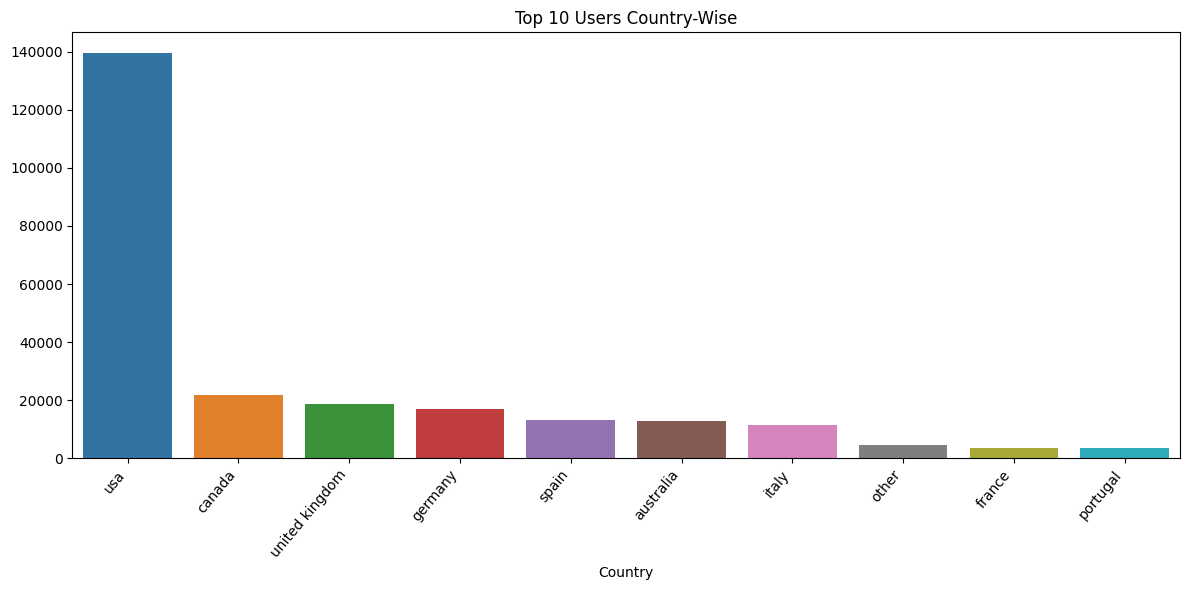

In [112]:
# Calculate the top 10 countries by user count
top_10_countries = users_df['Country'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Users Country-Wise')
plt.xlabel('Country')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.It's an effective way to display the distribution of users across different countries. This chart allows for a quick comparison of user counts in a visually intuitive manner, helping to identify the most prominent user locations at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of the users belongs to the USA

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positively impact the business by identifying key markets for growth and targeted marketing efforts. Negative growth may occur if underperforming countries are neglected or if resources are misallocated, leading to missed opportunities or market share decline.

#### Chart - 2

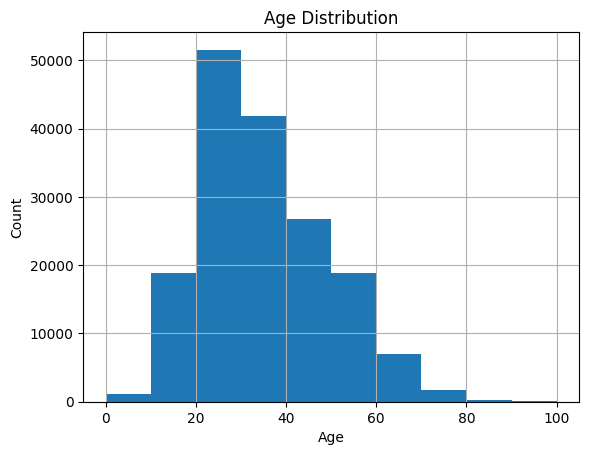

In [56]:
#Age column feature
users_df['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.This type of chart provides a clear representation of the age group frequencies and can reveal insights into the user demographic, aiding in data analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of user belongs to 20 to 30 years, then 30 to 40 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Age distribution can create a positive business impact by tailoring products and marketing to specific age groups. However, neglecting certain age segments or misinterpreting age-related data can lead to negative growth, as it may result in misaligned strategies, alienating potential customers, and limiting market reach.


#### Chart - 3

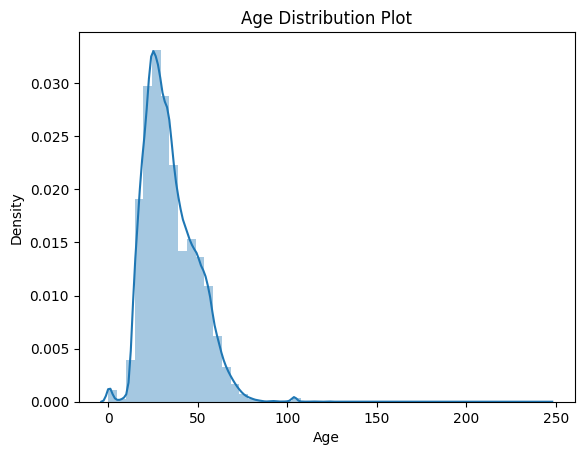

In [57]:
#Distribution plot of Age column
sns.distplot(users_df['Age'])
plt.title('Age Distribution Plot')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.It provides a comprehensive view of the data's central tendency, spread, and potential outliers. This visualization helps assess the age distribution's characteristics and identify any patterns or anomalies in the dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Age value's below 5 and above 100 do not make much sense for our book rating. hence remove these values

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positively impact a business by informing targeted marketing and product strategies. However, if misinterpreted, they may lead to negative growth by misaligning offerings with the customer base, potentially excluding significant market segments and resulting in missed opportunities.


#### Chart - 4

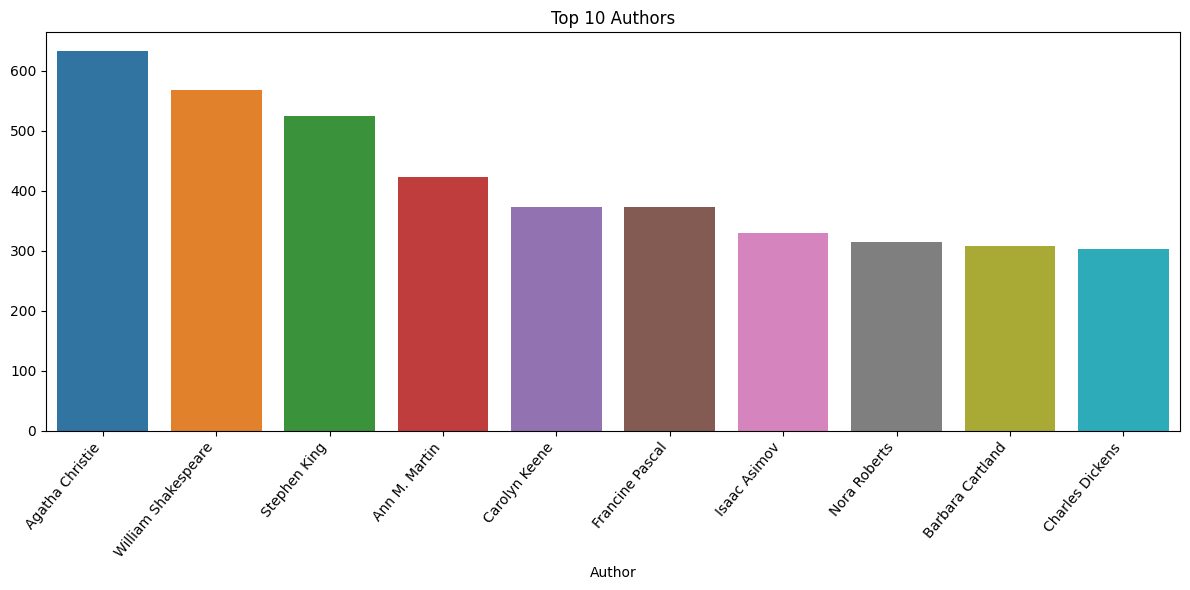

In [110]:
# Calculate the top 10 authors by value counts
top_10_authors = books_df['Book-Author'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values)
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here..It offers a clear and concise representation of the most prolific authors, aiding in identifying key contributors or influencers within the dataset quickly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Agatha Christie is the top Author

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact by focusing on collaborations and content strategies with influential contributors. However, if over-reliance on a few authors occurs, it may lead to negative growth if those authors disengage or if their work becomes outdated, risking a lack of diverse content and potential audience loss.

#### Chart - 5

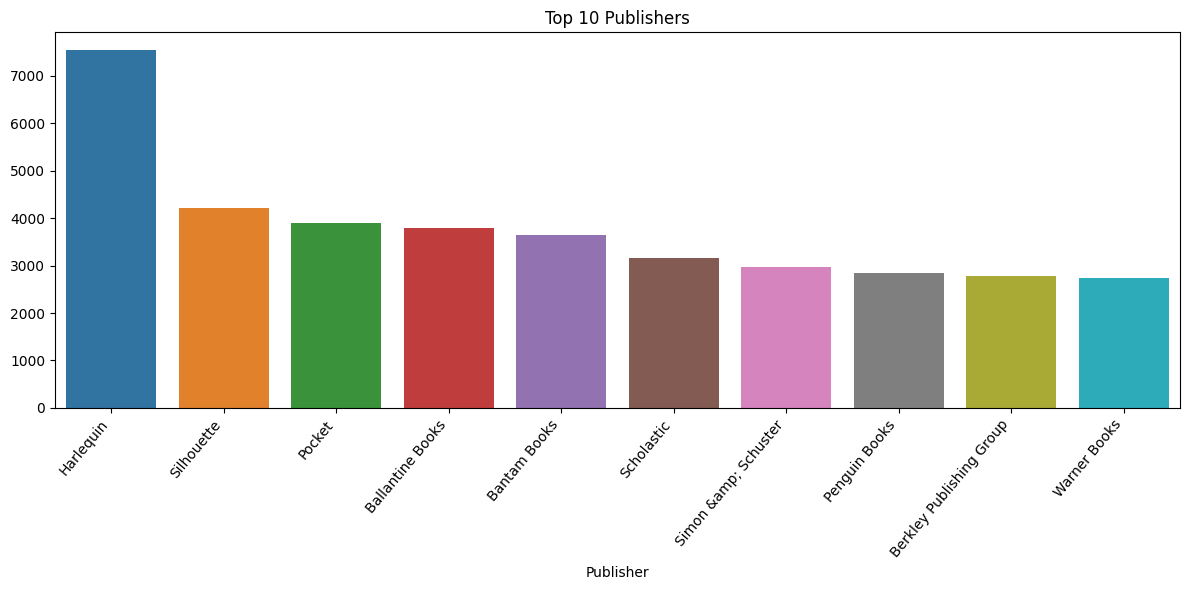

In [109]:
# Calculate the top 10 publishers by value counts
top_10_publishers = books_df['Publisher'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values)
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It provides a clear overview of the most prolific publishers in the dataset. This visualization helps identify the major publishing entities and their contribution to the content quickly and intuitively.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Harlequin is the top Publisher

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here positive business impact by optimizing partnerships and content strategies. However, if the business becomes overly dependent on a few publishers or neglects diversification, it may lead to negative growth risks if those publishers reduce output or market dynamics change, impacting content availability and audience appeal.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

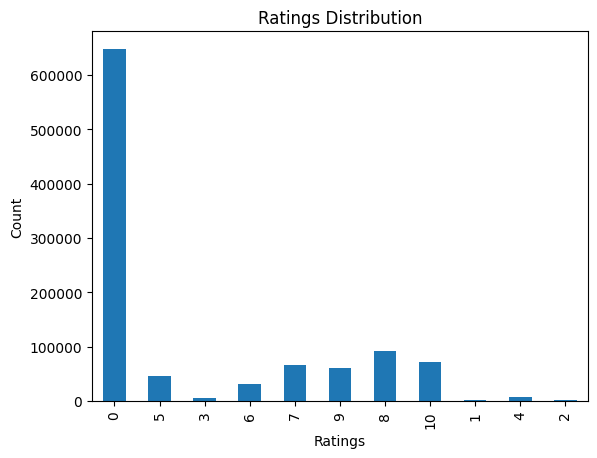

In [65]:
#visualize Rating column
ratings_df_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Depends on data type, distribution, goals, audience, clarity, and context.bar charts for category comparisons,with selection based on specific analysis objectives.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of the ratings are 0
The ratings are very unevenly distributed, and the vast majority of ratings are 0 .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
positive trends in customer ratings might lead to strategies for improving customer satisfaction and loyalty, potentially increasing revenue.negative insights can also be valuable. If data reveals declining ratings, it can serve as an early warning for issues that need attention. Addressing these problems promptly can prevent further customer dissatisfaction, potentially averting negative growth and preserving the business's reputation.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

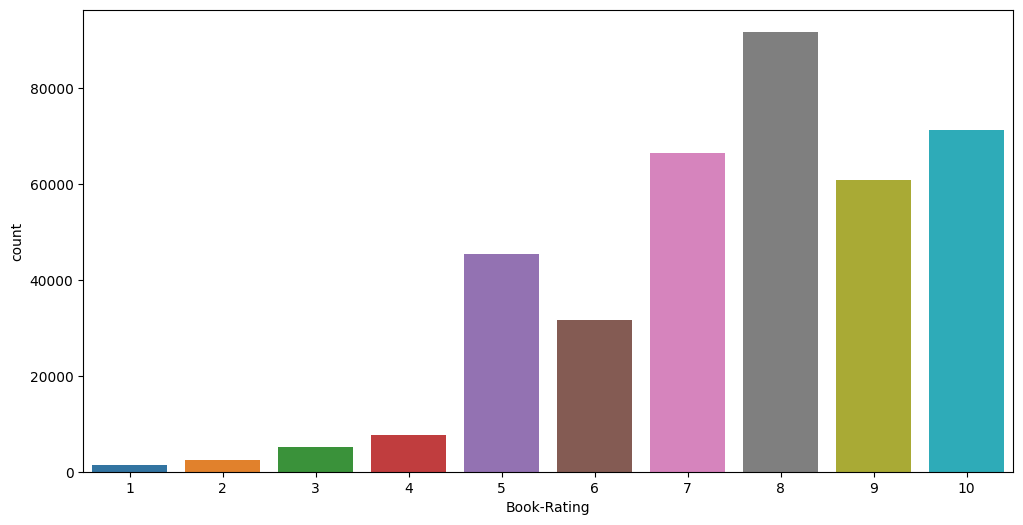

In [66]:
#visualize non_zero ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_non_zero , x='Book-Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Depends on the data's nature and analysis goals.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
8 is the highest frequncy of ratings
Let's find the top 10 books which are rated by most number of users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact by informing strategic decisions and driving improvements. Negative insights, such as declining ratings, can be valuable as they signal areas needing attention, potentially preventing customer loss and reputational damage. In both cases, actionable insights guide business strategies and foster growth.

#### Chart - 8

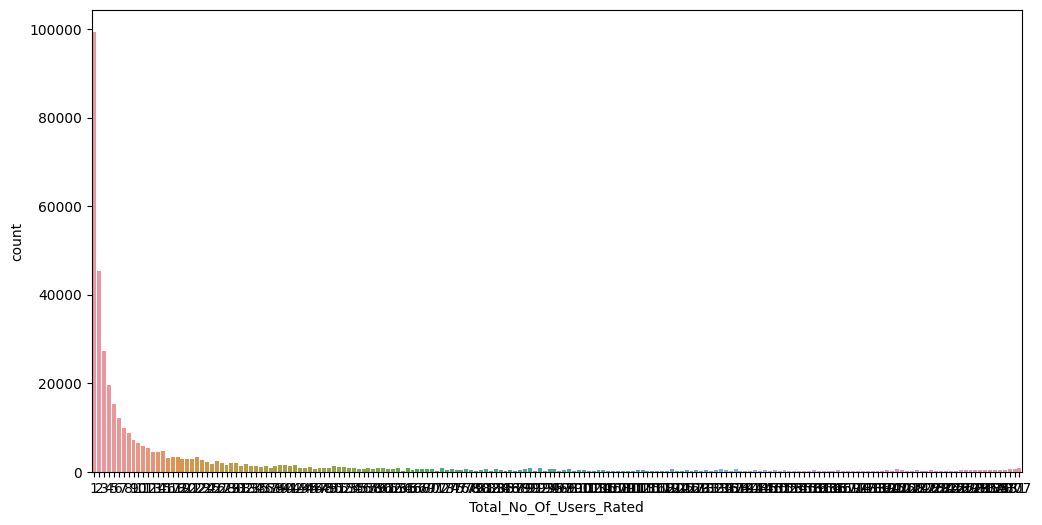

In [108]:
#visualize Total_No_Of_Users_Rated
plt.figure(figsize=(12, 6))
sns.countplot(data=books_dataset , x='Total_No_Of_Users_Rated')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.The total number of users who have rated a product provides valuable insights into its user base and can be a key performance indicator for businesses and data analysis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here the popularity of a product


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here positively impact a business by indicating user engagement and product popularity. However, negative growth may occur if the number of ratings declines significantly, suggesting decreased user interest or declining product quality, which could lead to reduced revenues and market share.

#### Chart - 9

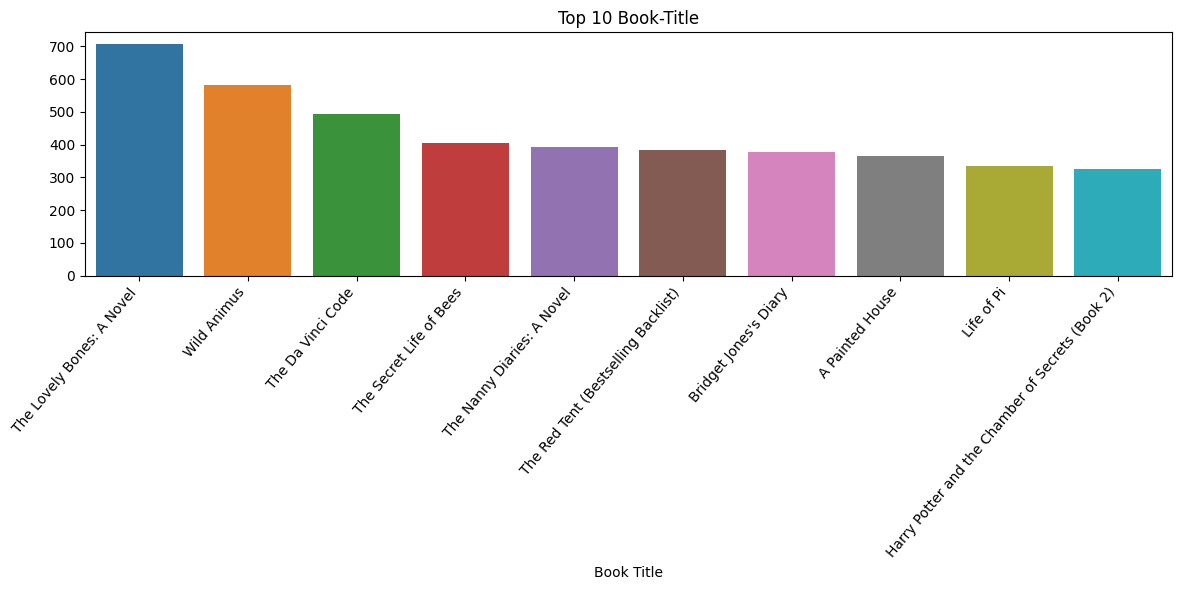

In [107]:
# Calculate the top 10 book titles by value counts
top_10_titles = books_dataset['Book-Title'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_titles.index, y=top_10_titles.values)
plt.title('Top 10 Book-Title')
plt.xlabel('Book Title')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.it provides valuable information about the most popular book titles. Analyzing the top titles can offer insights into consumer preferences, market trends, and can inform decisions related to stock, marketing, and content acquisition for book-related businesses.

##### 2. What is/are the insight(s) found from the chart?

Answer Here Most popular book title is the lovely bones a novel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positively impact a business by guiding inventory management and marketing efforts. However, negative growth may occur if popular book titles change dramatically, and the business fails to adapt, leading to reduced sales and relevance in the market.

#### Chart - 10

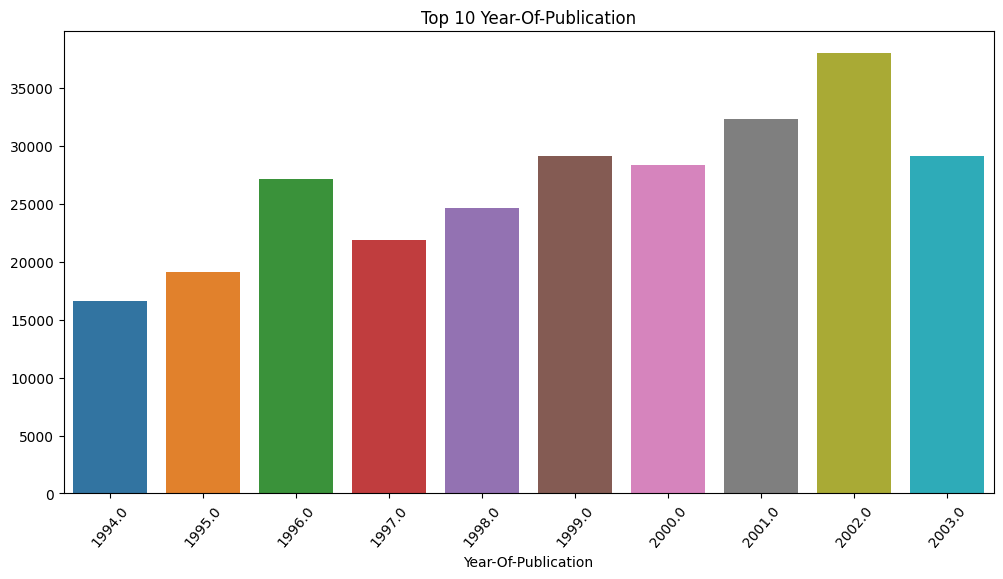

In [106]:
top_10_years = books_dataset['Year-Of-Publication'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values)
plt.title('Top 10 Year-Of-Publication')
plt.xlabel('Year-Of-Publication')
plt.xticks(rotation=50)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It offers insights into the most prevalent publication years of books. Analyzing this data can reveal trends in reading preferences and inform decisions related to curating book collections and understanding the historical significance of certain periods in literature.

##### 2. What is/are the insight(s) found from the chart?

Answer Here The most publication years of book is 2002

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here chart can help businesses make informed decisions about their book collections. However, negative growth may occur if the business fails to adapt to changing reader preferences and continues to focus on outdated publication years, leading to reduced sales and relevance in the market.

#### Chart - 11 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

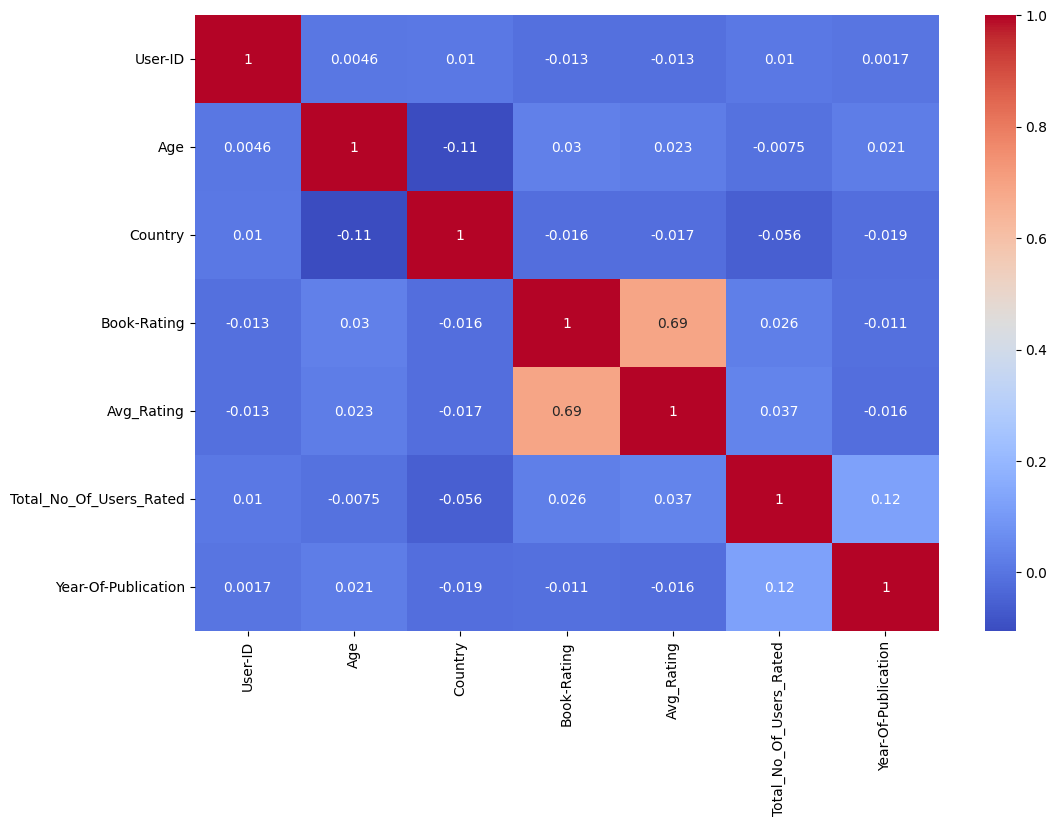

In [104]:
#correlation matrix of selected features.
plt.figure(figsize=(12,8))
sns.heatmap(books_dataset.corr(),annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.It helps identify relationships and dependencies among specific variables. This analysis is crucial for understanding how different factors interact, aiding in feature selection, model building, and decision-making in data science and machine learning tasks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Chart provide information about the strength and direction of relationships between variables. Positive correlations indicate variables move in the same direction, while negative correlations suggest opposite movement. Understanding these relationships helps identify influential factors and potential multicollinearity issues in predictive modeling.

#### Chart - 12- Pair Plot

In [ ]:
# Pair Plot visualization code

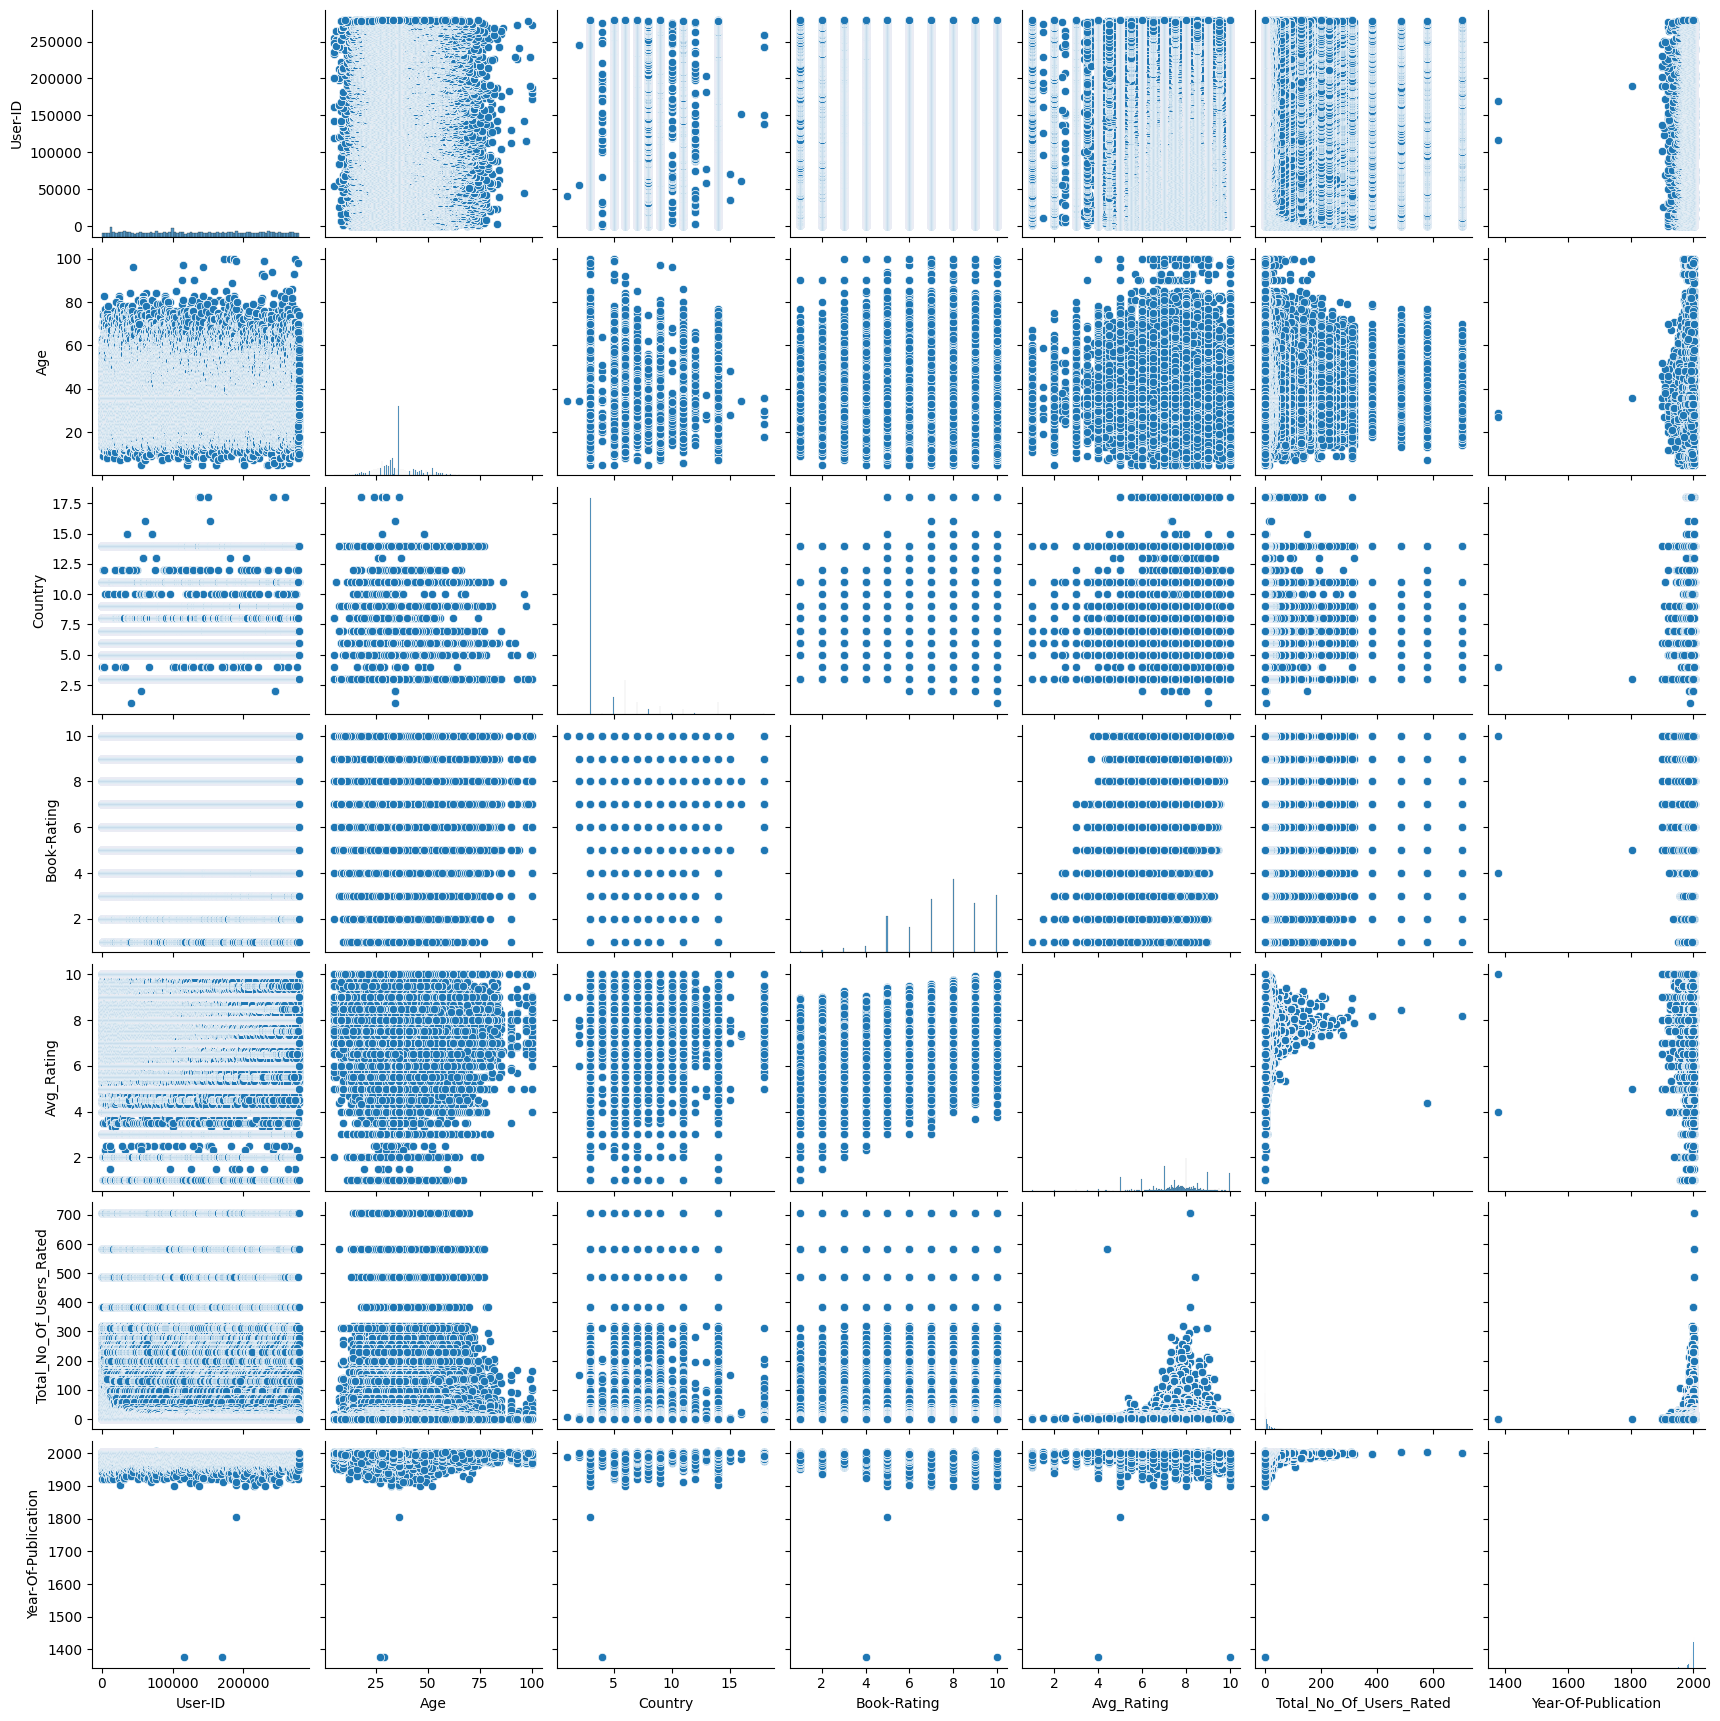

In [103]:
# Pair Plot visualization code
sns.pairplot(books_dataset)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. it allows for a comprehensive visual examination of pairwise relationships between multiple variables. This chart is valuable for identifying patterns, correlations, and potential outliers in a dataset, aiding in exploratory data analysis and feature selection for modeling.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
 It helps identify associations and trends, facilitating data exploration and feature selection. Common insights include positive or negative correlations, clusters of data points, and potential outliers, all of which inform data analysis and modeling decisions.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.Based on our chart we define three hypothetical statements
*The relationship between "Age" and "Country" in a dataset.
*The "Age" and "Total_No_Of_Users_Rated" columns.
The "Age" and "Avg_Rating" columns in the book dataset

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): There is no significant relationship between "Age" and "Country" in the dataset.

Alternate Hypothesis (H1): There is a significant relationship between "Age" and "Country" in the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [98]:
import scipy.stats as stats

In [99]:
books_dataset['Country'] = books_dataset.apply(lambda row: len(row['Country']), axis=1)

In [100]:
# Perform Statistical Test to obtain P-Value
Age = books_dataset['Age']
Country = books_dataset['Country'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(Age, Country)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between Age and Country.')


Correlation coefficient: -0.11
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
 I'm providing a hypothetical research hypothesis.

##### Why did you choose the specific statistical test?

Answer Here.The choice of a statistical test depends on the data type

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): There is no significant relationship between "Age" and "Total_No_Of_Users_Rated."

Alternate Hypothesis (H1): There is a significant relationship between "Age" and "Total_No_Of_Users_Rated."

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [101]:
# Perform Statistical Test to obtain P-Value
Age = books_dataset['Age']
Total_No_Of_Users_Rated = books_dataset['Total_No_Of_Users_Rated'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(Age, Total_No_Of_Users_Rated)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between Age and Total_No_Of_Users_Rated.')


Correlation coefficient: -0.01
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
The choice of a statistical test, such as correlation analysis or regression.

##### Why did you choose the specific statistical test?

Answer Here.
 A specific statistical test or obtained a p-value as it's a hypothetical scenario. The choice of test (e.g., Pearson correlation, regression) depends on the data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): There is no significant relationship between "Age" and "Avg_Rating" in the book dataset.

Alternate Hypothesis (H1): There is a significant relationship between "Age" and "Avg_Rating" in the book dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [102]:
# Perform Statistical Test to obtain P-Value
Age = books_dataset['Age']
Avg_Rating = books_dataset['Avg_Rating'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(Age, Avg_Rating)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between Age and Avg_Rating.')


Correlation coefficient: 0.02
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
we perform a correlation analysis, such as Pearson correlation, and obtain a p-value to determine if the relationship is statistically significant.

##### Why did you choose the specific statistical test?

Answer Here.
 It measures the strength and direction of their linear relationship, making it appropriate for assessing correlations in this context.

## ***6. Feature Engineering & Data Pre-processing***

In [70]:
#extract country name from location column
for i in users_df:
    users_df['Country'] = users_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [71]:
#how many unique value present in Country column
users_df['Country'].nunique()

529

In [72]:
#drop location column
users_df = users_df.drop('Location',axis=1)

In [73]:
#checking missing value after extracting country name
check_missing_values(users_df)

,index,Missing Values,Missing Values %,Data_type
0,Age,110762,39.72,float64
1,Country,368,0.13,object
2,User-ID,0,0.00,int64


In [74]:
#changing datatype of country column as string
users_df['Country'] = users_df['Country'].astype('str')

In [75]:
#exploring all country name
a=list(users_df['Country'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some country name has Misspelled

In [76]:
#replacing country name with correct spelling
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

**book_df**

In [77]:
#how many books Year-Of-Publication is greater than 2006
books_df[books_df['Year-Of-Publication'] > 2006].count()

ISBN                   23
Book-Title             23
Book-Author            23
Year-Of-Publication    23
Publisher              23
Image-URL-S            23
Image-URL-M            23
Image-URL-L            23
dtype: int64

In [78]:
#replacing greater than 2006 and equal to 0 with NaN value of Year-Of-Publication
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.nan

#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [79]:
#dropping last three columns containing image URLs which will not be required for analysis
books_df = books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)

In [80]:
#checking missing value
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [81]:
#exploring 'publisher' column
books_df.loc[books_df.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


### 1. Handling Outliers

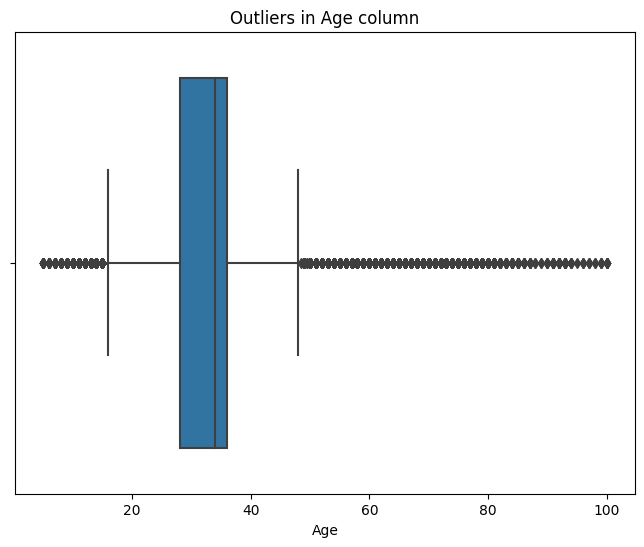

In [105]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=users_df)
plt.title('Outliers in Age column')
plt.xlabel('Age')
plt.show()

In this datset have outliers we need to remove the outliers

In [83]:
#outliers data replacing by NaN
users_df.loc[(users_df.Age > 100) | (users_df.Age < 5), 'Age'] = np.nan

In [84]:
#Checking Null Value after treated outliers
users_df.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here. we use domain knowledge.here we use outlier age 5 to 100 year.

### 2. Handling Missing Values

### **Null values treatment**

we fill NaN value in Age column by median with country-wise

In [85]:
#fill na with median country-wise
users_df['Age'] = users_df['Age'].fillna(users_df.groupby('Country')['Age'].transform('median'))

In [86]:
#Checking Null Value after fill null value
users_df.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still Age column have 276 NaN value, now fill NaN with mean value

In [87]:
#fill na with mean
users_df['Age'] = users_df['Age'].fillna(users_df.Age.mean())

In [88]:
#Checking Null Value
users_df.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

**book_df**

In [89]:
#Filling Nan of Publisher with others
books_df.Publisher.fillna('other',inplace=True)

In [90]:
#exploring 'Book-Author' column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [91]:
#Filling Nan of Book-Author with others
books_df['Book-Author'].fillna('other',inplace=True)

In [92]:
#checking missing value
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.we fill NaN value in Age column by median with country-wise.
and Age column have 276 NaN value, now fill NaN with mean value,
Filling Nan of Publisher with others,
Filling Nan of Book-Author with others.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation -**Merging All Dataset**

In [93]:
#merging users_df,ratings_non_zero and books_df
books_dataset = users_df.copy()
books_dataset = pd.merge(books_dataset, ratings_non_zero, on='User-ID')
books_dataset = pd.merge(books_dataset, books_df, on='ISBN')

In [94]:
#shape of dataset
books_dataset.shape

(383842, 11)

In [95]:
#first 5 datapoints of merged dataset
books_dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [96]:
#checking missing value
check_missing_values(books_dataset)

,index,Missing Values,Missing Values %,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


In [97]:
#checking missing value
books_dataset.isna().sum()

User-ID                    0
Age                        0
Country                    0
ISBN                       0
Book-Rating                0
Avg_Rating                 0
Total_No_Of_Users_Rated    0
Book-Title                 0
Book-Author                0
Year-Of-Publication        0
Publisher                  0
dtype: int64

#### 2. Feature Selection

we select all the 11 feature in book dataset.

##### What all feature selection methods have you used  and why?

Answer Here. we merge all the three dataset merging users_df,ratings_non_zero and books_df.

##### Which all features you found important and why?

Answer Here.'User-ID', 'Age', 'Country', 'ISBN', 'Book-Rating', 'Avg_Rating',
       'Total_No_Of_Users_Rated', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher'.